# 1. Import Libraries

In [14]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read File As CSV - Display First 10

In [7]:
url = "https://drive.google.com/file/d/1zyxGYcdKw4UZ5iCZgX6bFClKf7UHaOZw/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]

path = "lazada_global.csv"

df = pd.read_csv(path)

df.head(10)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6.011930e+15,20 Feb,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3.337760e+15,18 Nov,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",6.759580e+11,19 Aug,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6.011580e+15,24 Feb,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6.011460e+15,25 Oct,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82
5,"7502 Powell Mission Apt. 768\nTravisland, VA 3...",21 XT,PM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_5...,Silva-Anderson,3.024620e+13,25 Jul,7169,Discover,ynguyen@gmail.com,Fish farm manager,55.96.152.147,ru,25.15
6,"93971 Conway Causeway\nAndersonburgh, AZ 75107",96 Xt,AM,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Gibson and Sons,6.011400e+15,24 Jul,714,VISA 16 digit,olivia04@yahoo.com,Dancer,127.252.144.18,de,88.56
7,"260 Rachel Plains Suite 366\nCastroberg, WV 24...",96 pG,PM,Mozilla/5.0 (X11; Linux i686) AppleWebKit/5350...,Marshall-Collins,5.612520e+11,25 Jun,256,VISA 13 digit,phillip48@parks.info,Event organiser,224.247.97.150,pt,44.25
8,"2129 Dylan Burg\nNew Michelle, ME 28650",45 JN,PM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Galloway and Sons,1.800420e+14,24 Apr,899,JCB 16 digit,kdavis@rasmussen.com,Financial manager,146.234.201.229,ru,59.54
9,"3795 Dawson Extensions\nLake Tinafort, ID 88739",15 Ug,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,"Rivera, Buchanan and Ramirez",4.396280e+12,17 Jan,931,American Express,qcoleman@hunt-huerta.com,Forensic scientist,236.198.199.8,zh,95.63


# 3. Determine Most, Average, Least Price

In [8]:
# Place The DataFrame Into A Test DataFrame
data = df

print(f"Max Price: {data['Purchase Price'].max()}")                         # Print The Maximum Price
print(f"Average Price: {round(np.average(data['Purchase Price']), 2)}")     # Print The Average Pice And Rounding It To 2 Decimal Places
print(f"Min Price: {data['Purchase Price'].min()}")                         # Print The Minimum Price

Max Price: 99.99
Average Price: 50.35
Min Price: 0.0


# 4. Determine Engineer Titles

In [9]:
engineers = data[data['Job'].str.contains('engineer')]     # Place The Resulting Data Into An Output DataFrame

print(engineers['Job'])                                    # Print The Output DataFrame

1               Drilling engineer
3               Drilling engineer
50            Mechanical engineer
103      Technical sales engineer
193               Energy engineer
                  ...            
9934    Consulting civil engineer
9948          Structural engineer
9970          Electrical engineer
9977          Biomedical engineer
9996              Energy engineer
Name: Job, Length: 531, dtype: object


# 5. Compare Number Of Purchases Between AM and PM (Using Graphs)

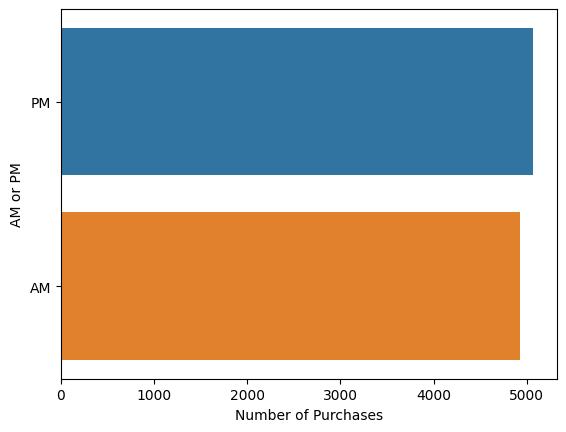

In [10]:
data = df

sns.countplot(y='AM or PM', data=data, hue="AM or PM")
plt.xlabel("Number of Purchases")

plt.show()

# 6. Compare Number Of Customers Who Use Mastercard, Visa, And American Express

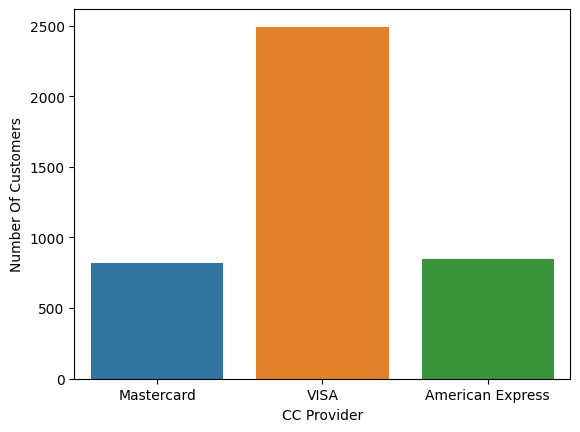

In [11]:
data = df

data['CC Provider'] = data['CC Provider'].replace(['VISA 16 digit', 'VISA 13 digit'], "VISA")

filtered_data = data[data['CC Provider'].str.startswith(('VISA', 'Mastercard', 'American Express'))]

sns.countplot(x='CC Provider', data=filtered_data, hue='CC Provider')
plt.ylabel("Number Of Customers")

plt.show()

# 7. Determine The Most Used Domain Name

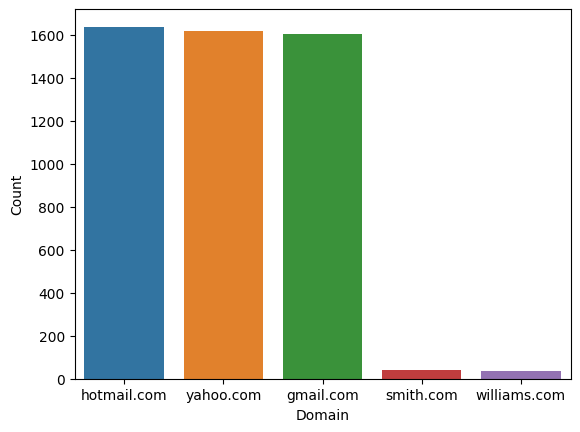

In [19]:
data = df

data['Domain'] = data['Email'].str.split(pat="@").str.get(-1)

domain_counts = df['Domain'].value_counts().reset_index(name='Count').head(5)

sns.barplot(x='Domain', y='Count', data=domain_counts, hue="Domain")

plt.show()